In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import pickle
from tqdm.notebook import tqdm
from pathlib import Path

## easy task instructions 

1. The next room will introduce laser gates. Avoid running right away or you might run right into the first laser gate. Instead, inch toward to the first one and wait for it to shut off and then run past it. 
2. Don’t try to run past the next set of laser gates because you won’t make it.
3. Just be patient and make your way to the gem at the far left.

**no hard**
1. Move slowly toward to the left and wait for column to disappear.
2. wait for the column to disappear walk to the left stop before next column. 
3. carefully wait for the laser and make your way to the gem at the far left.

## normal task instructions 

1. Walk through the door on your right and then jump onto the purple rope,
2. climb up a bit and wait for the skull to roll to the left and then Jump off.
3. jump over the skull when it comes back to the right.
4. make a final jump to the white rope off the left side of the platform and climb up. 
5. Jump right and then grab the torch hanging above the conveyor belt.

**no hard**
1. climb up ladder go right, 
2. climb above on rope and hold 
3. wait until rolling skull gets close , then jump over it .
4. go left , jump over skull and climb rope. 
5. jump on the moving bar and jump up to get the yellow torch.


## hard task instructions
1. Go down that ladder and walk right immediately to avoid falling off the conveyor belt,
2. Jump to the yellow rope and again to the platform on the right.
3. Go down the ladder here and wait for the skull to approach you and then jump over it. 
4. Now, go up the ladder at the left end, grab the key
5. Backtrack to where you started the game. Walk through the door on the left.

**no hard**
1. 'step off the ladder and move right',
2. 'from the yellow pole jump right onto the platform',
3. 'go left slight , jump over skull .' ,
4. 'move left to the ladder and climb up, jump up to get the key',
5. 'Backtrack to where you started the game. Walk through the door on the left.'

In [3]:
testing_vid_easy = "./testing_data/easy_task/testing_video.mp4"
testing_vid_normal = "./testing_data/normal_task/testing_video.mp4"
testing_vid_hard = "./testing_data/hard_task/testing_video.mp4"

In [202]:
vid_frame_arr = []
cap = cv2.VideoCapture(testing_vid_normal)
if (cap.isOpened()== False): 
    print("Error opening video stream or file")
    
# Read until video is completed
while(cap.isOpened()):
    
  # Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        vid_frame_arr.append(frame)
    else:
        break
    

In [265]:
ind_count = 0

In [326]:
event_star_ind_end_ind_hard_task = [[22,40], [40, 56], [58, 82], [86, 112], [116, 134]]
event_star_ind_end_ind_easy_task = [[0,27], [28,37], [38,44]]
event_star_ind_end_ind_normal_task = [[13,26], [27,34],[35,43],[44,48],[49,59]]

Showing ind 59


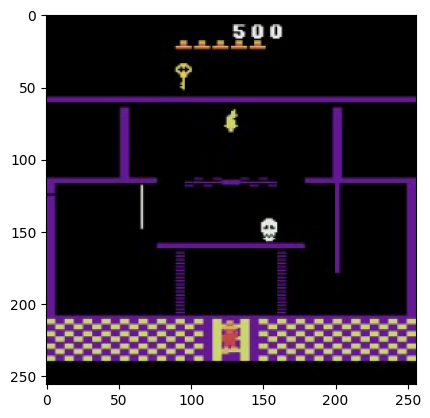

In [325]:
plt.imshow(vid_frame_arr[ind_count])
print(f"Showing ind {ind_count}")
ind_count += 1
plt.show()

In [327]:
valid_vid_duration_hard_task = [[0, 50],[20, 76], [48, 100], [80, 134], [100, 138]]
valid_vid_duration_easy_task = [[0,27], [28,37], [38,44]]
valid_vid_duration_normal_task = [[0,30], [20,40],[25,50],[30,50],[40,59]]

In [328]:
event_star_ind_end_ind_relative_hard_task =  [[22,40], [20, 36], [10, 34], [6, 32], [16, 34]]
event_star_ind_end_ind_relative_easy_task =  [[0,27], [0,9], [0,6]]
event_star_ind_end_ind_relative_normal_task =  [[13,26], [7,14], [10,18], [14,18], [9,19]]

In [331]:
vid_no = 0 
for i, vid_dur in enumerate(valid_vid_duration_easy_task):
    start_ind_g, end_ind_g = vid_dur
    si, ei = event_star_ind_end_ind_relative_easy_task[i]
    the_frames = vid_frame_arr[start_ind_g: end_ind_g]
    output_path = os.path.join("./testing_data/easy_task/video_clip_testing_stride_8_256",  f"{vid_no}_si_{si}_ei_{ei}.mp4")
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_path, fourcc, 6.25, (256, 256)) # 6.25 for 8 stride 
    for img in the_frames:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        writer.write(img)
    writer.release() 
    vid_no += 1

In [332]:
vid_no = 0 
for i, vid_dur in enumerate(valid_vid_duration_normal_task):
    start_ind_g, end_ind_g = vid_dur
    si, ei = event_star_ind_end_ind_relative_normal_task[i]
    the_frames = vid_frame_arr[start_ind_g: end_ind_g]
    output_path = os.path.join("./testing_data/normal_task/video_clip_testing_stride_8_256",  f"{vid_no}_si_{si}_ei_{ei}.mp4")
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_path, fourcc, 6.25, (256, 256)) # 6.25 for 8 stride 
    for img in the_frames:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        writer.write(img)
    writer.release() 
    vid_no += 1

In [ ]:
vid_no = 0 
for i, vid_dur in enumerate(valid_vid_duration_hard_task):
    start_ind_g, end_ind_g = vid_dur
    si, ei = event_star_ind_end_ind_relative_hard_task[i]
    the_frames = vid_frame_arr[start_ind_g: end_ind_g]
    output_path = os.path.join("./testing_data/hard_task/video_clip_testing_stride_8_256",  f"{vid_no}_si_{si}_ei_{ei}.mp4")
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_path, fourcc, 6.25, (256, 256)) # 6.25 for 8 stride 
    for img in the_frames:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        writer.write(img)
    writer.release() 
    vid_no += 1

## Sent emb model

In [2]:
# Config
SEN_EMB_DIM = 768
# import packages 
import numpy as np
import torch
import re
import pickle 
import os
from tqdm import tqdm_notebook as tqdm
from scipy.spatial.distance import cosine
from transformers import AutoModel, AutoTokenizer
from sentence_transformers import SentenceTransformer

# try another way
model = SentenceTransformer('sentence-transformers/gtr-t5-xl')

## Spell correction

In [3]:
import pkg_resources
from symspellpy import SymSpell
from symspellpy import Verbosity
from nltk.stem import PorterStemmer 
import string
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

# Set up sym_spell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
bigram_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_bigramdictionary_en_243_342.txt"
)
# term_index is the column of the term and count_index is the
# column of the term frequency
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

ps = PorterStemmer()
wnl = WordNetLemmatizer()
english_vocab = set(w.lower() for w in nltk.corpus.words.words())
def correct(w):
    if all([not c.isalpha() for c in w]): return w
    
    word = w
    
    # Fix for strings with punctuations in them
    # Otherwise, it will try to spellcheck with the punctuation included which messes up results
    word_no_punc = w.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    split = word_no_punc.split()
    l = len(split)
    if l > 1:
        corrected = []
        i = 0
        while i < l:
            if i == l-1:
                corrected.append(correct(split[i]))
                break
        
            # if the words combined are english, then consider it as one word
            tmp = split[i] + split[i+1]
            if wnl.lemmatize(word=tmp) in english_vocab or ps.stem(tmp) in english_vocab:
                corrected.append(tmp)
                i += 1
            # otherwise, spellcheck them separately
            else:
                corrected.append(correct(split[i]))
            i += 1
        return corrected
    else:
        word_no_punc = word_no_punc.strip()
    
    o = sym_spell.lookup(word_no_punc,
        Verbosity.CLOSEST,
        max_edit_distance = 2,
        transfer_casing = True)
    
    if not o: return w

    word = o[0].term
    if w[0].isupper():
        word = word[0].upper() + ''.join(word[1: ])

    start_punc = end_punc = ''
    
    # Get start punctuation
    for c in w:
        if c in string.punctuation:
            start_punc += c
        else:
            break

    # Get end punctuation
    for c in reversed(w):
        if c in string.punctuation:
            end_punc = c + end_punc
        else:
            break
            
    return start_punc + word + end_punc

def spellcheck_keep_punctuation(sentence):
    # Replace apostrophe/short words 
    # specific
    sentence = re.sub(r"won\'t", "will not", sentence)
    sentence = re.sub(r"can\'t", "can not", sentence)

    # general
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    # add space to punctuation 
    sentence = sentence.translate(str.maketrans({key: " {0} ".format(key) for key in string.punctuation}))
    corrected = []
    for word in sentence.split():
        corrected_word = correct(word)
        if isinstance(corrected_word, list):
            corrected.extend(corrected_word)
        else:
            corrected.append(corrected_word)
    phrase = ' '.join(corrected).lower()
    
    return phrase

[nltk_data] Downloading package wordnet to /home/sukai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/sukai/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to /home/sukai/nltk_data...
[nltk_data]   Package words is already up-to-date!


## Sentence embedding

In [4]:
def convert_to_sentence_embedding(raw_sentence):
    preprocessed_sentence = spellcheck_keep_punctuation(raw_sentence)
    # Get the embeddings
    with torch.no_grad():
        embeddings = model.encode(preprocessed_sentence) # shape (768,)
    return embeddings # shape : [<SENTENCE_EMB_DIM>,]

## Phrase chunking model

In [5]:
from flair.data import Sentence
from flair.models import SequenceTagger
pos_model = SequenceTagger.load("flair/chunk-english")

/home/sukai/anaconda3/envs/atari/lib/python3.8/site-packages/huggingface_hub/file_download.py:588: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


2022-12-14 17:07:41,772 loading file /home/sukai/.flair/models/chunk-english/5b53097d6763734ee8ace8de92db67a1ee2528d5df9c6d20ec8e3e6f6470b423.d81b7fd7a38422f2dbf40f6449b1c63d5ae5b959863aa0c2c1ce9116902e8b22
2022-12-14 17:07:42,350 SequenceTagger predicts: Dictionary with 45 tags: <unk>, O, B-NP, E-NP, I-NP, S-PP, S-VP, S-SBAR, S-ADVP, S-NP, S-ADJP, B-VP, E-VP, B-PP, E-PP, I-VP, S-PRT, B-ADVP, E-ADVP, B-ADJP, E-ADJP, B-CONJP, I-CONJP, E-CONJP, I-ADJP, B-SBAR, E-SBAR, S-INTJ, I-ADVP, I-PP, B-UCP, I-UCP, E-UCP, S-LST, B-PRT, I-PRT, E-PRT, S-CONJP, B-INTJ, E-INTJ, I-INTJ, B-LST, E-LST, <START>, <STOP>


In [6]:
def convert_to_phrase_chunking(raw_sentence):
    preprocessed_sentence = spellcheck_keep_punctuation(raw_sentence)
    preprocessed_sentence = Sentence(preprocessed_sentence)
    # Get the embeddings
    with torch.no_grad():
        pos_model.predict(preprocessed_sentence) # shape (768,)
    return ([w.data_point.text for w in preprocessed_sentence.get_labels()],
            [w.value for w in preprocessed_sentence.get_labels()]) # type: lst(str)

## Verb Phrase and Noun Phrase 

In [7]:
# we should catch the VP PP and VP
ACTION_PATTERNS = [
    ['VP', 'PP'],
    ['VP'],
]
NOUN_PATTERNS = [
    ['PP', 'NP'],
    ['NP', 'PP'],
    ['NP'],
]

In [8]:
def loop_pattern(pattern, left_tag_arr, left_sentence, left_global_indices_arr):
    # should output the indices of found pattern
    pattern_len = len(pattern)
    if pattern_len > len(left_tag_arr):
        return None
    for start_ind in range(len(left_tag_arr) - pattern_len + 1):
        is_found = True
        for pattern_ind in range(pattern_len):
            if pattern[pattern_ind] != left_tag_arr[start_ind + pattern_ind]:
                is_found = False 
                break
        if is_found:
            # means we found the pattern, we trim the left_global_indices_arr 
            # get the indices of the pattern
            pattern_local_indices = list(range(start_ind, start_ind+ pattern_len))
            # return phrase, pattern, left_tag_arr, left_sentence, left_global_indices_arr
            phrase = left_sentence[start_ind : start_ind+ pattern_len]
            left_tag_arr = left_tag_arr[:start_ind] + ["PH"] + left_tag_arr[start_ind+ pattern_len:]
            left_sentence = left_sentence[:start_ind] + ["PH"] + left_sentence[start_ind+ pattern_len:]
            left_global_indices_arr = left_global_indices_arr[:start_ind] + left_global_indices_arr[start_ind+ pattern_len:]
            return phrase, pattern, left_tag_arr, left_sentence, left_global_indices_arr
    # end loop and find nothing means we need to change to another pattern to search 
    return None 

def find_pattern(pattern_arr, original_sentence, original_tag_arr): # type: pattern_arr, str, tag_arr
    left_tag_arr = original_tag_arr
    left_sentence = original_sentence
    left_global_indices_arr = list(range(len(left_sentence)))
    output_phrase_arr = []
    output_pattern_arr = []
    for pattern in pattern_arr:
        while True:
            output = loop_pattern(pattern, left_tag_arr, left_sentence, left_global_indices_arr)
            if output is not None:
                # means we found something, 
                phrase, the_pattern, left_tag_arr, left_sentence, left_global_indices_arr = output
                output_phrase_arr.append(phrase)
                output_pattern_arr.append(the_pattern)
            else:
                # we go for the next pattern
                break
    return output_phrase_arr, output_pattern_arr

In [9]:
def preprocess_instruction_text(texts):
    new_dict = dict()

    for key,val in tqdm(enumerate(texts)):
        phrase_chunking_str, phrase_chunking_tag = convert_to_phrase_chunking(val)

        verb_phrase_arr = []
        vphrase_arr, _ = find_pattern(ACTION_PATTERNS,
                             phrase_chunking_str,
                             phrase_chunking_tag)
        for phrase in vphrase_arr:
            str_phrase = ' '.join(phrase)
            # add the phrase arr to data
            verb_phrase_arr.append(str_phrase)

        noun_phrase_arr = []
        nphrase_arr, _ = find_pattern(NOUN_PATTERNS,
                             phrase_chunking_str,
                             phrase_chunking_tag)
        for phrase in nphrase_arr:
            str_phrase = ' '.join(phrase)
            # add the phrase arr to data
            noun_phrase_arr.append(str_phrase)


        new_dict[key] = {"spell_correction_txt": spellcheck_keep_punctuation(val),
                         "embedding": convert_to_sentence_embedding(val),
                         "phrase_chunking_sentence": phrase_chunking_str,
                         "phrase_chunking_tag": phrase_chunking_tag,
                         'verb_phrase_arr': verb_phrase_arr,
                         'noun_phrase_arr': noun_phrase_arr
                        }
    return new_dict

In [347]:
# instruction_texts = [
#     'The next room will introduce laser gates. Avoid running right away or you might run right into the first laser gate. Instead, inch toward to the first one and wait for it to shut off and then run past it.',
#     'Don’t try to run past the next set of laser gates because you won’t make it.',
#     'Just be patient and make your way to the gem at the far left.'

# ]
instruction_texts = [
    'Walk through the door on your right and then jump onto the purple rope,',
    'climb up a bit and wait for the skull to roll to the left and then Jump off.',
    'jump over the skull when it comes back to the right.',
    'make a final jump to the white rope off the left side of the platform and climb up.',
    'Jump right and then grab the torch hanging above the conveyor belt.'
]

# instruction_texts = [
#     'Go down that ladder and walk right immediately to avoid falling off the conveyor belt,',
#     'Jump to the yellow rope and again to the platform on the right.',
#     'Go down the ladder here and wait for the skull to approach you and then jump over it.' ,
#     'Now, go up the ladder at the left end, grab the key',
#     'Backtrack to where you started the game. Walk through the door on the left.'
# ]

In [348]:
valid_inst_data_dict = preprocess_instruction_text(instruction_texts)

/tmp/ipykernel_804449/3813676130.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for key,val in tqdm(enumerate(texts)):


0it [00:00, ?it/s]

In [349]:
# with open("./testing_data/easy_task/test_text_dict.pkl", 'wb') as f:
#     pickle.dump(valid_inst_data_dict, f)
with open("./testing_data/normal_task/test_text_dict.pkl", 'wb') as f:
    pickle.dump(valid_inst_data_dict, f)
# with open("./testing_data/hard_task/test_text_dict.pkl", 'wb') as f:
#     pickle.dump(valid_inst_data_dict, f)

In [16]:
# instruction_texts_no_hard = [
#     'Move slowly toward to the left and wait for column to disappear.',
#     'wait for the column to disappear walk to the left stop before next column.',
#     'carefully wait for the laser and make your way to the gem at the far left.',
# ]

# instruction_texts_no_hard = [
#     'climb up ladder go right,',
#     'climb above on rope and hold',
#     'wait until rolling skull gets close , then jump over it .',
#     'go left , jump over skull and climb rope.',
#     'jump on the moving bar and jump up to get the yellow torch.'
# ]

instruction_texts_no_hard = [
    'step off the ladder and move right',
    'from the yellow pole jump right onto the platform',
    'go left slight , jump over skull .' ,
    'move left to the ladder and climb up, jump up to get the key',
    'Backtrack to where you started the game. Walk through the door on the left.'
]

In [17]:
valid_inst_data_dict_no_hard = preprocess_instruction_text(instruction_texts_no_hard)

/tmp/ipykernel_1002294/3813676130.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for key,val in tqdm(enumerate(texts)):


0it [00:00, ?it/s]

In [18]:
# with open("./testing_data/easy_task/test_text_dict_no_hard.pkl", 'wb') as f:
#     pickle.dump(valid_inst_data_dict_no_hard, f)
# with open("./testing_data/normal_task/test_text_dict_no_hard.pkl", 'wb') as f:
#     pickle.dump(valid_inst_data_dict_no_hard, f)
with open("./testing_data/hard_task/test_text_dict_no_hard.pkl", 'wb') as f:
    pickle.dump(valid_inst_data_dict_no_hard, f)

## output structure

```
dict: {<data_id> : {
                    "spell_correction_txt": type->str,
                    "embedding": type-> ndarray(768,),
                    "phrase_chunking_sentence": type -> lst(str)
                    "phrase_chunking_tag": type-> lst(str),
                    'verb_phrase_arr': lst(str)
                    'noun_phrase_arr': lst(str)
                    }
      }

```

## Preprocess All training data

In [26]:
training_instruction_path = "train_data/training_instruction_dict_raw.pkl"
test_pos_ins_path = "test_data/testing_positive_instruction_dict_raw.pkl"
test_neg_ins_path = "test_data/testing_negative_instruction_dict_raw.pkl"

In [27]:
word_correction_dict = {
    'claim' : 'climb',
    'club' : 'climb',
    'done' : "do not",
    'clip' : 'climb',
    'clumping': 'climbing',
    'clime' : 'climb',
    'hope' : 'hop',
    'toe': 'to',
    'endow': 'end',
    'latter' : 'ladder',
    'bride' : 'bridge',
    'leaser':'laser',
    'later' : 'ladder',
    'leaf':'left',
    'snack':'snake',
    'rob': 'rope',
    'don': 'do not',
    'article': 'verticle',
    'life edge' : 'left edge',
    'done' : 'do not',
    'ans' : "and",
    'skelton' : 'skeleton',
    'skilled' : 'skull'
}


In [29]:
data_size = 6870

In [28]:
with open(training_instruction_path, 'rb') as f:
    data_one = pickle.load(f)
with open(test_pos_ins_path, 'rb') as f:
    data_two = pickle.load(f)
with open(test_neg_ins_path, 'rb') as f:
    data_three = pickle.load(f)
data_combine = dict()

for key, val in data_one.items():
    data_combine[key] = val

for key, val in data_two.items():
    data_combine[key] = val
    
for key, val in data_three.items():
    data_combine[key] = val

In [30]:
data_dict = dict()
for i in range(data_size):
    data_dict[i] = data_combine[i]

In [35]:
def replacewords(original_sent, old_phrase, new_phrase):
    # will return the new sentence
    start_ind = original_sent.find(old_phrase)
    if start_ind == -1:
        return None
    temp = old_phrase
    if start_ind != 0: 
        temp = " " + temp
    if start_ind + len(old_phrase) != len(original_sent):
        temp = temp + " "
    old_phrase = temp
    phrase_len = len(old_phrase)
    start_ind = original_sent.find(old_phrase)
    if start_ind == -1:
        return None
    else:
        new_sent = original_sent[:start_ind] + " " + new_phrase + " " + original_sent[start_ind + phrase_len:]
        return new_sent

    

def preprocess_instruction_text(the_dict):
    new_dict = dict()

    for key,val in tqdm(the_dict.items()):
        sent_text = spellcheck_keep_punctuation(val)
        
        for wrong_w, cor_w in word_correction_dict.items(): # word correction
            o = replacewords(sent_text, wrong_w, cor_w)
            if o is not None:
                sent_text = o
                
        phrase_chunking_str, phrase_chunking_tag = convert_to_phrase_chunking(sent_text)

        verb_phrase_arr = []
        vphrase_arr, _ = find_pattern(ACTION_PATTERNS,
                             phrase_chunking_str,
                             phrase_chunking_tag)
        for phrase in vphrase_arr:
            str_phrase = ' '.join(phrase)
            # add the phrase arr to data
            verb_phrase_arr.append(str_phrase)

        noun_phrase_arr = []
        nphrase_arr, _ = find_pattern(NOUN_PATTERNS,
                             phrase_chunking_str,
                             phrase_chunking_tag)
        for phrase in nphrase_arr:
            str_phrase = ' '.join(phrase)
            # add the phrase arr to data
            noun_phrase_arr.append(str_phrase)


        new_dict[key] = {"spell_correction_txt": sent_text,
                         "embedding": convert_to_sentence_embedding(sent_text),
                         "phrase_chunking_sentence": phrase_chunking_str,
                         "phrase_chunking_tag": phrase_chunking_tag,
                         'verb_phrase_arr': verb_phrase_arr,
                         'noun_phrase_arr': noun_phrase_arr
                        }
    return new_dict

In [36]:
training_data_dict = preprocess_instruction_text(data_dict)

/tmp/ipykernel_265593/1744145721.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for key,val in tqdm(the_dict.items()):


  0%|          | 0/6870 [00:00<?, ?it/s]

In [37]:
with open("training_data/train_text_dict.pkl", 'wb') as f:
    pickle.dump(training_data_dict, f)